# Linear Regression Example
The example below uses only the first feature of the `diabetes` dataset,
in order to illustrate the data points within the two-dimensional plot.
The straight line can be seen in the plot, showing how linear regression
attempts to draw a straight line that will best minimize the
residual sum of squares between the observed responses in the dataset,
and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of
determination are also calculated.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


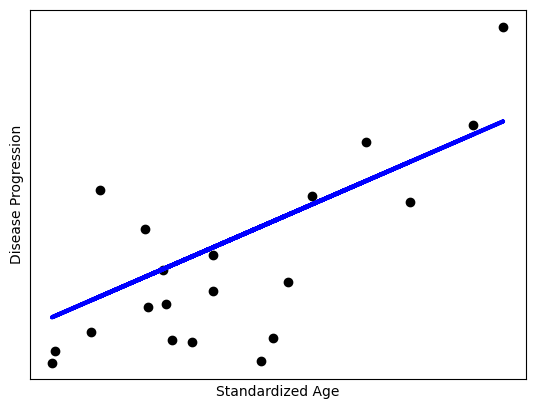

In [7]:
# Code source: Jaques Grobler
# License: BSD 3 clause

# This example comes from https://scikit-learn.org/stable/modules/linear_model.html

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

# Label the axes
plt.xlabel("Standardized Age")
plt.ylabel("Disease Progression")
plt.xticks(())
plt.yticks(())

plt.show()

# Multicollinearity
The author describes a situation where multicollinearity may cause a problem.  So we'll explore that further.

Let's create a scenario where multicollinearity could become a problem, we need to use multiple features that are highly correlated with each other. Here's an example of how you could modify your code to include this issue.

I'll modify the Code to Use Multiple Correlated Features

Instead of using just one feature, let's use two or more features from the dataset and check if there is any multicollinearity between them. We'll use a few features and artificially create correlations between them to show how this can cause issues.

**Use of Multiple Features**: Instead of using only one feature (as in your original code), I selected three features (diabetes_X[:, [0, 2, 3]]), which are arbitrary features from the dataset.

**Artificial Multicollinearity**: We create multicollinearity by artificially making the third feature (diabetes_X[:, 2]) a combination of the first two features (diabetes_X[:, 1] and diabetes_X[:, 0]). This induces a high correlation between these features.

**Variance Inflation Factor (VIF)**: To detect multicollinearity, we compute the Variance Inflation Factor (VIF) for each feature. VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 5 (or 10) suggests significant multicollinearity.

Outputs and Interpretation:

**Coefficients**: You will get the regression coefficients for each of the three features. However, due to multicollinearity, these coefficients will be unreliable, and the model may have difficulty distinguishing the contributions of the individual features.

**VIF**: You will see the VIF values printed for each feature. If there is high multicollinearity, the VIF values will be significantly greater than 1, indicating that the features are highly correlated and causing problems for OLS regression.

**Mean Squared Error & R2R2**: These metrics will still show the overall performance of the model. Even if the model has multicollinearity, the performance in terms of predictions may not necessarily degrade. The problem with multicollinearity lies in the interpretability of the coefficients.

Coefficients: 
 [ 4.290372   34.45030186  9.95554874]
Mean squared error: 2610.80
Coefficient of determination: 0.46
Variance Inflation Factors for each feature:  [ 2.1070449  16.48053621 19.01781666]


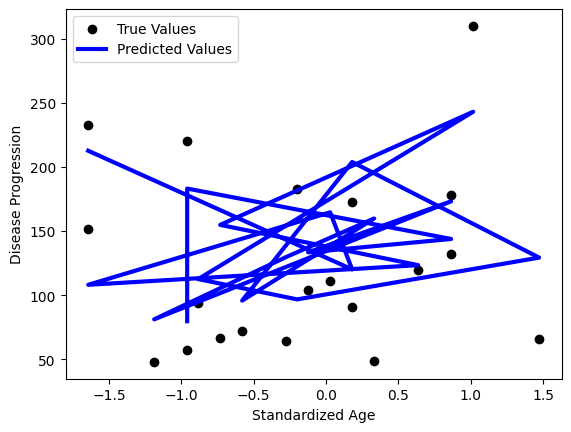

Execution finished, check the output above.


In [8]:
# Code source: Trinidad Marroquin from Jaques Grobler
# License: MIT License

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

try:
    # Load the diabetes dataset
    diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

    # Ensure dataset has been loaded correctly
    if diabetes_X is None or diabetes_y is None:
        raise ValueError("Failed to load the diabetes dataset")

    # Let's use three features that may be correlated
    diabetes_X = diabetes_X[:, [0, 2, 3]]  # We'll pick arbitrary features here

    # Create some multicollinearity by adding artificial correlation
    # Adding some random noise to avoid perfect multicollinearity
    np.random.seed(42)
    diabetes_X[:, 2] = diabetes_X[:, 1] * 0.8 + diabetes_X[:, 0] * 0.2 + np.random.normal(0, 0.01, size=diabetes_X.shape[0])

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes_y[:-20]
    diabetes_y_test = diabetes_y[-20:]

    # Check if the training and test sets have correct shapes
    if diabetes_X_train.shape[0] == 0 or diabetes_X_test.shape[0] == 0:
        raise ValueError("Training or test data not properly split")

    # Standardize features (optional but often helpful for linear models)
    scaler = StandardScaler()
    diabetes_X_train = scaler.fit_transform(diabetes_X_train)
    diabetes_X_test = scaler.transform(diabetes_X_test)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    print("Coefficients: \n", regr.coef_)

    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

    # Let's calculate the Variance Inflation Factor (VIF) to check for multicollinearity
    vif_data = np.array([variance_inflation_factor(diabetes_X_train, i) for i in range(diabetes_X_train.shape[1])])
    print("Variance Inflation Factors for each feature: ", vif_data)

    # Plot outputs with labeled axes
    plt.scatter(diabetes_X_test[:, 0], diabetes_y_test, color="black", label="True Values")
    plt.plot(diabetes_X_test[:, 0], diabetes_y_pred, color="blue", linewidth=3, label="Predicted Values")

    # Label the axes
    plt.xlabel("Standardized Age")
    plt.ylabel("Disease Progression")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

except ValueError as ve:
    print(f"ValueError occurred: {ve}")
except IndexError as ie:
    print(f"IndexError occurred: {ie}")
except Exception as e:
    # Catch-all for any other errors
    print(f"An error occurred: {e}")

finally:
    print("Execution finished, check the output above.")


This code, along with few code checks and "try" clauses to make is more robust, it now demonstrates how multicollinearity can arise and be detected in a linear regression model. Although the predictions may still be accurate, the high VIF values and unstable coefficients indicate that the features are not independent of each other, leading to unreliable coefficient estimates.  The issue of multicollinearity will be handled in a seperate study.